In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
File = '/gpfs/loomis/project/fas/david_moore/aj487/Data_WL110/Outgassing_Setup/20211008/RGAScan_2021-10-08.h5'

In [3]:
rga_scans = np.array(pd.read_hdf(File, key='rga/rga'))
rga_timestamps = np.array(pd.read_hdf(File, key='rga/timestamp'))
amu = np.arange(1,100.01,0.1)

In [4]:
delta_t = [datetime.strptime(x, '%Y%m%d%H%M%S') for x in rga_timestamps]
delta_t = [(x-delta_t[0]).total_seconds() for x in delta_t]

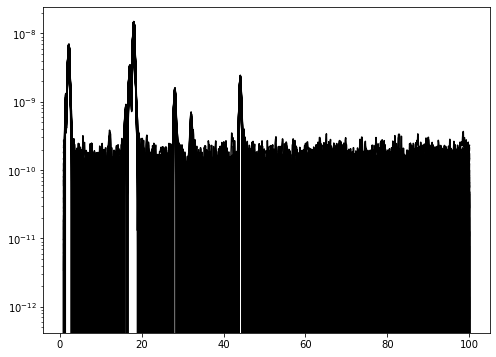

In [5]:
plt.figure(figsize=(8,6))
for x in rga_scans: 
    plt.plot(amu, x, color='k')
plt.yscale('log')

In [6]:
cut_water = np.where((amu<18.5) & (amu>17.5))
cut_n2 = np.where((amu<28.5) & (amu>27.5))

water = [np.max(x[cut_water]) for x in rga_scans]
n2 = [np.max(x[cut_n2]) for x in rga_scans]

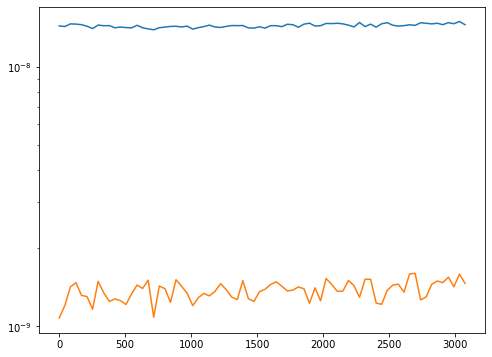

In [7]:
plt.figure(figsize=(8,6))
plt.plot(delta_t, water)
plt.plot(delta_t, n2)
plt.yscale('log')